<a href="https://colab.research.google.com/github/PedroAlmeida18/PGP3_TESTESIND/blob/main/Otimiza%C3%A7ao_redeneural1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Otimização

Text(0, 0.5, 'color_intensity')

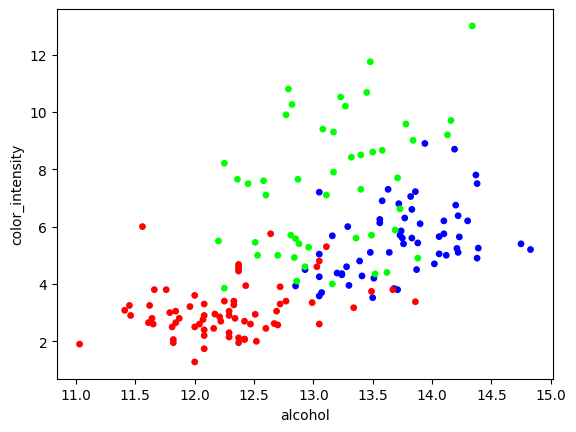

In [40]:
from sklearn import datasets
import matplotlib.pyplot as plt


feature = [0,9]
wine = datasets.load_wine()
data = wine.data[:,feature]
targets = wine.target
plt.scatter(data[:,0],data[:,1],c=targets,s =15,cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[feature[0]])
plt.ylabel(wine.feature_names[feature[1]])
#TRÊS CLASSES DE VINHOS


#Normalização dos dados para um processamneto da rede neural

Text(0, 0.5, 'color_intensity')

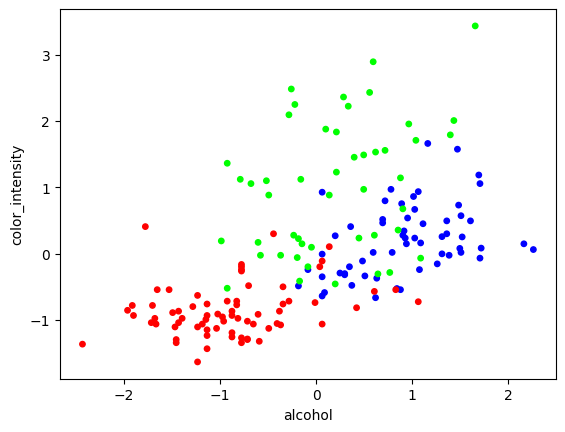

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
#Para os dados ficar em um intervalo mais parecido
plt.scatter(data[:,0],data[:,1],c=targets,s =15,cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[feature[0]])
plt.ylabel(wine.feature_names[feature[1]])


#Instanciar a rede

In [42]:

import torch
from torch import nn

if torch.cuda.is_available():
  device = torch.device('cuda')
else :
  device = torch.device('cpu')
print(device)
input_size = data.shape[1]
hidden_size=32
out_size = len(wine.target_names) #Númeor de classes
net = nn.Sequential(nn.Linear(input_size,hidden_size), nn.ReLU(),
                    nn.Linear(hidden_size,out_size),nn.Softmax())
net = net.to(device )


cuda


#Vizualizar a fronteira de decisão

In [43]:
import numpy as np

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

  spacing = min(x_max - x_min, y_max - y_min) / 100

  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

  data = np.hstack((XX.ravel().reshape(-1,1),
                    YY.ravel().reshape(-1,1)))

  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)

  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

  Z = clf.reshape(XX.shape)

  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


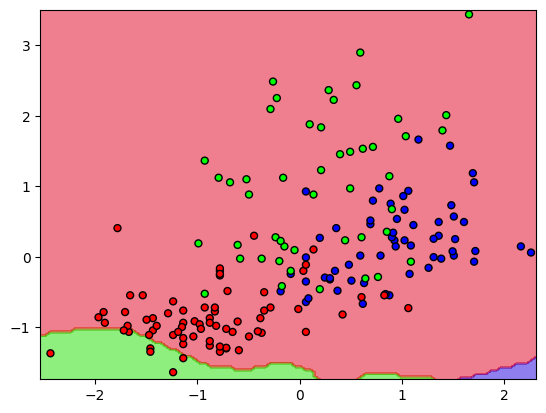

In [44]:
plot_boundary(data, targets, net)

In [45]:
from torch import optim

#Definir a função de perda
criterion = nn.CrossEntropyLoss().to(device)

#função de otimização a descida do gradiente
optimizer = optim.SGD(net.parameters(), lr= 1e-3)

#Hiperparâmetros
Taxa de aprendizagem

In [46]:
X = torch.FloatTensor(data).to(device)
Y= torch.LongTensor(targets).to(device)

#Treinar um modelo

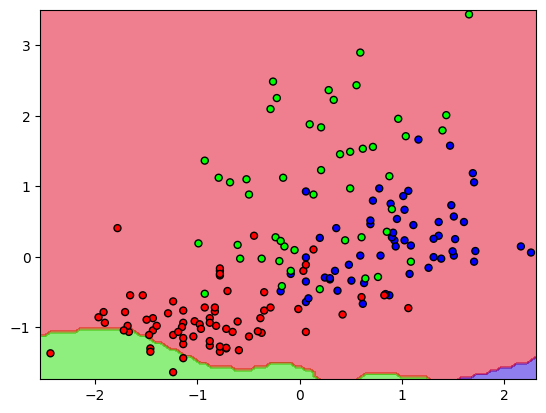

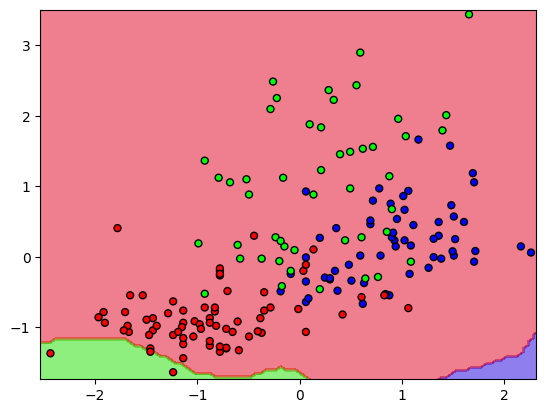

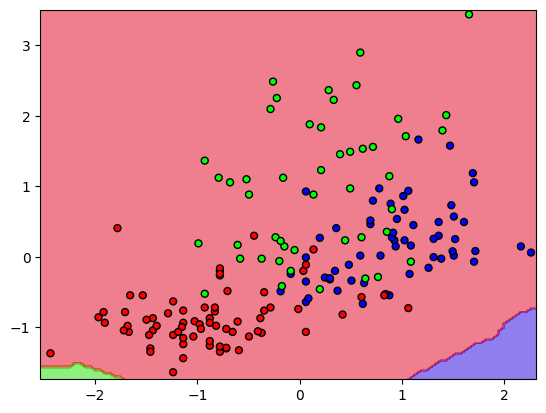

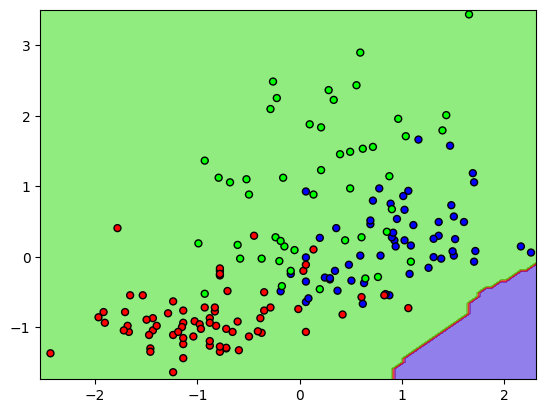

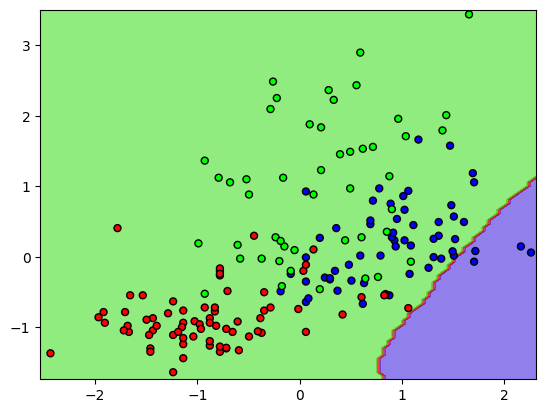

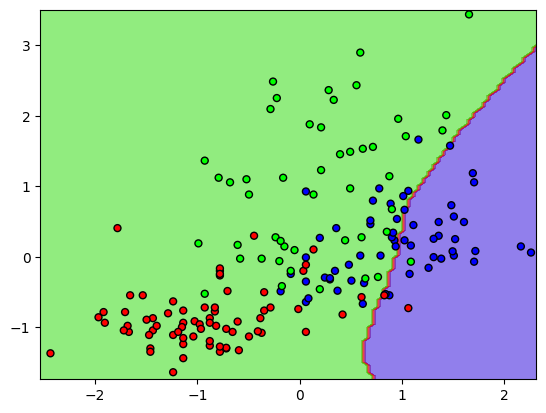

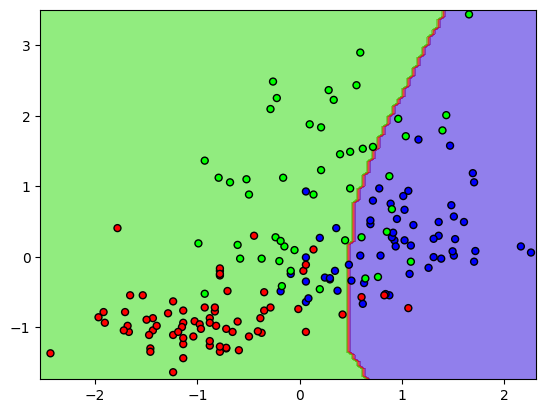

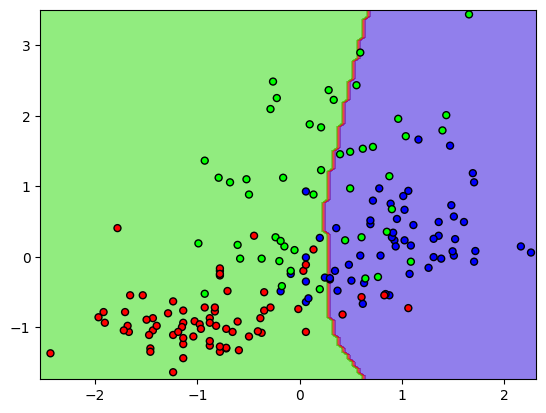

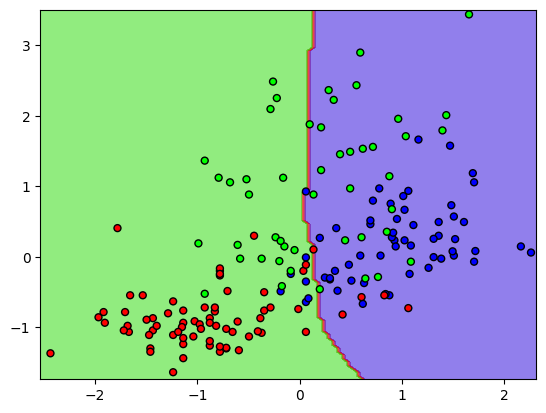

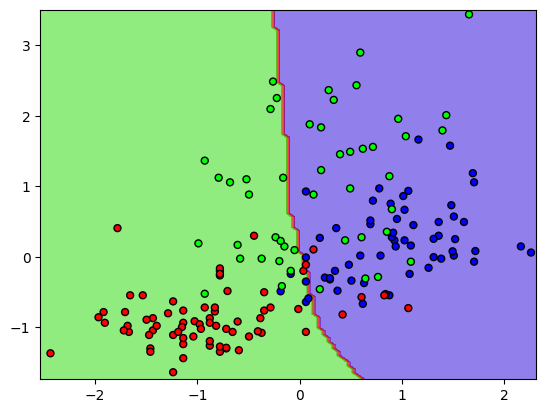

In [47]:
for i in range(100):
  #forward

  pred = net(X)
  loss = criterion(pred,Y)
  #Backward
  loss.backward()
  optimizer.step()
  if i%10==0:
    plt.figure()
    plot_boundary(data, targets, net)


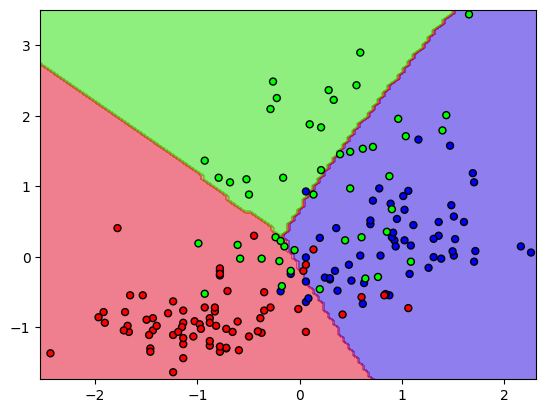

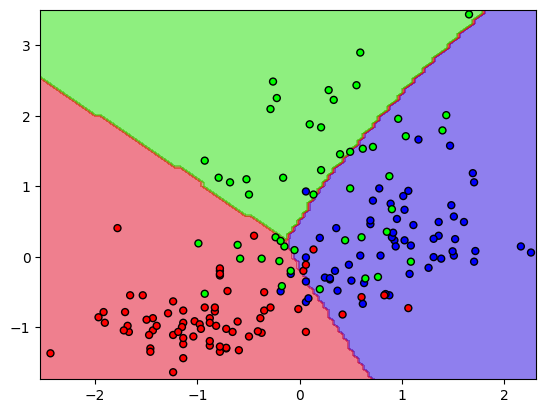

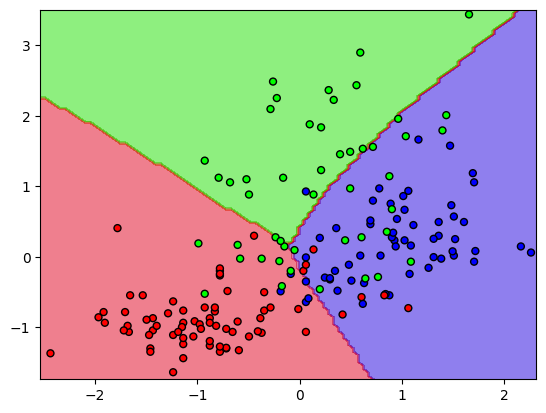

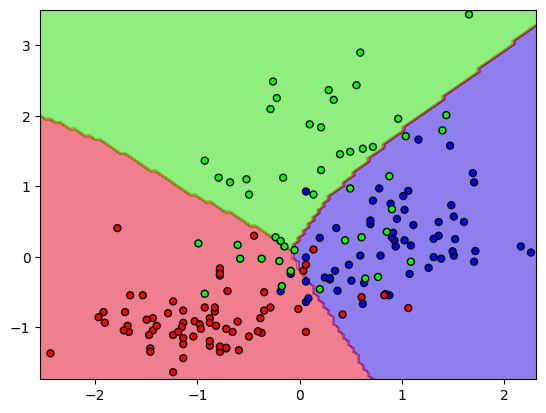

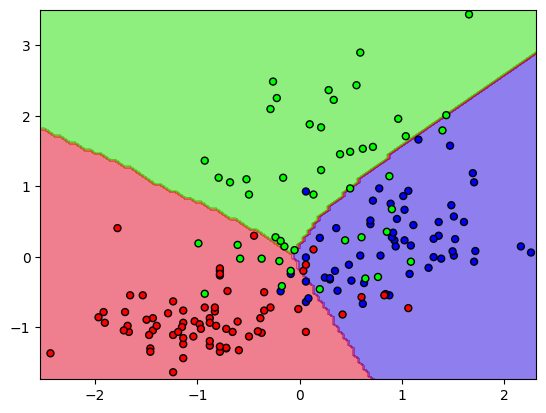

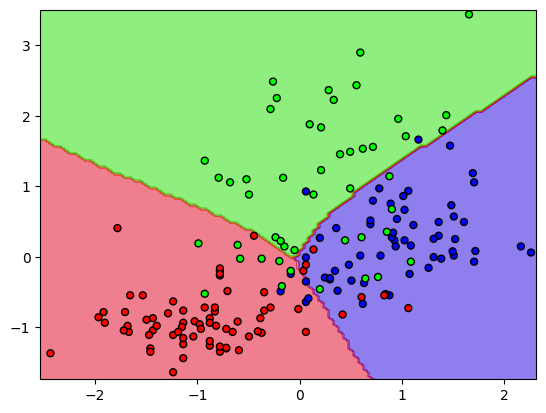

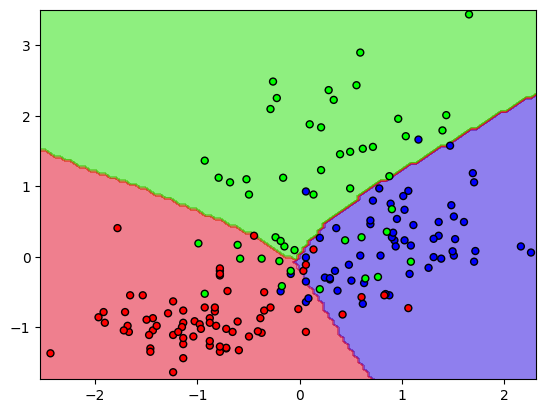

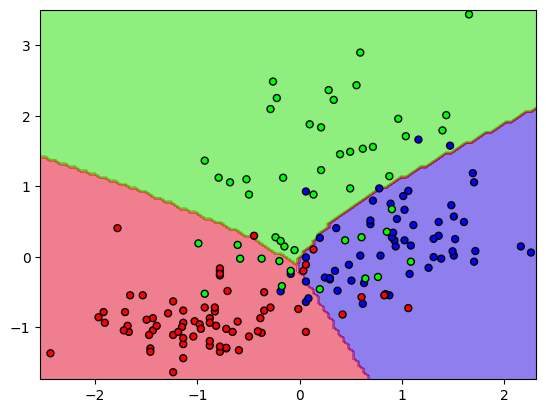

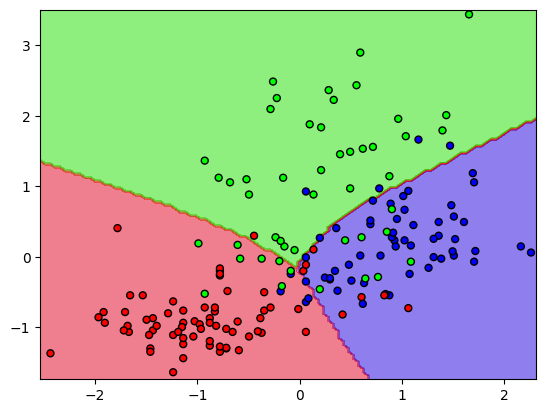

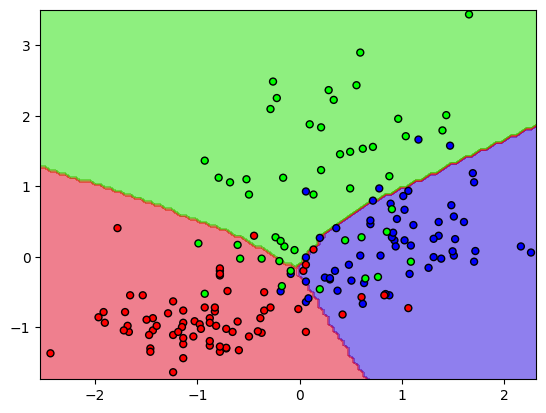

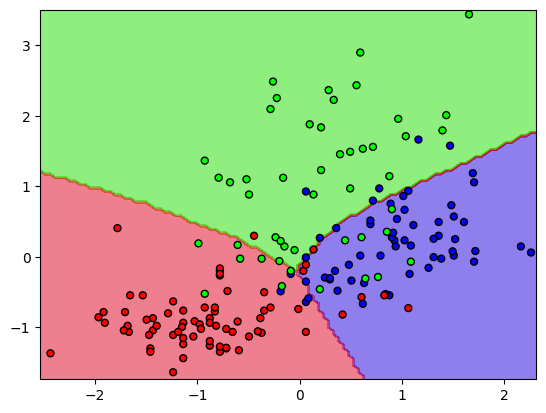

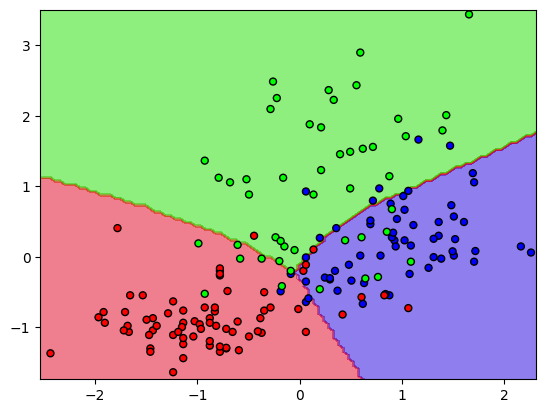

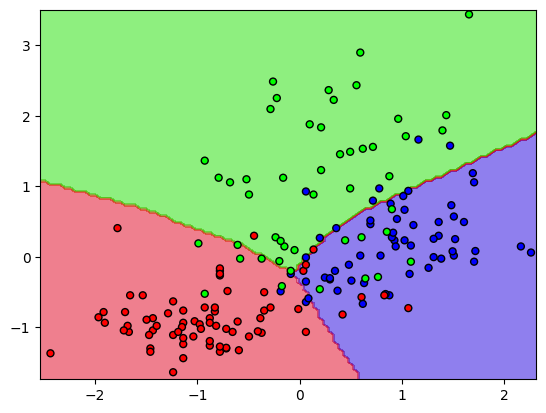

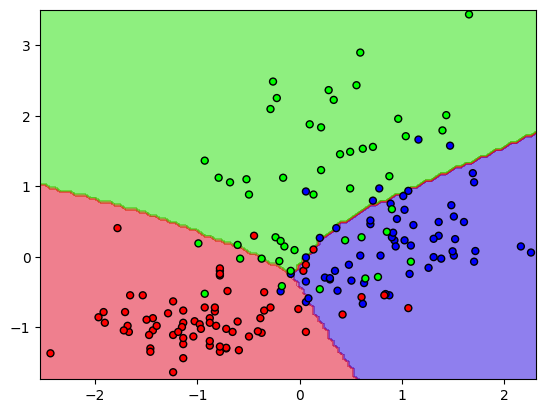

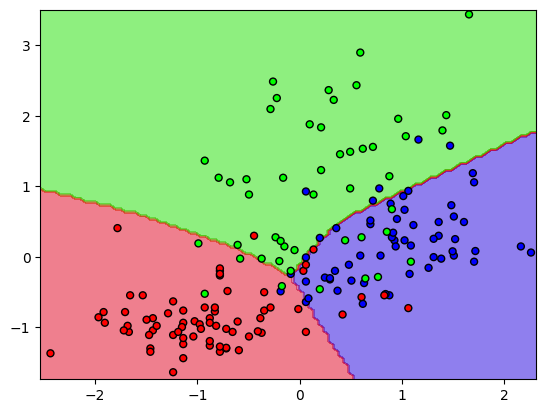

In [49]:
for i in range(150):
  #forward

  pred = net(X)
  loss = criterion(pred,Y)
  #Backward
  loss.backward()
  optimizer.step()
  if i%10==0:
    plt.figure()
    plot_boundary(data, targets, net)